# **Загрузка зависимостей**

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

# **Загрузка данных**

In [22]:
file_path = '../data/data_clean.csv'
data = pd.read_csv(file_path, encoding='utf-8')

# **Очистка данных**

In [23]:
data['Цена(в $)'] = data['Цена(в $)'].str.replace(' ', '').astype(int)
data['Пробег'] = data['Пробег'].str.replace(' тыс.км', '').str.replace(' ', '').astype(float)

# **Визуализация**

In [24]:
# Настройка стиля графиков
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

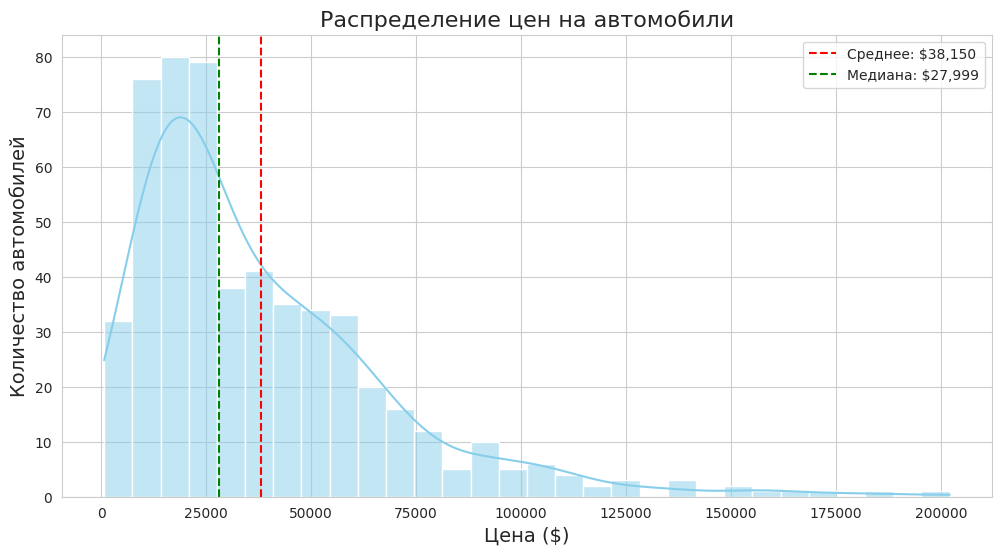

In [25]:
# 1. Распределение цен
plt.figure()
sns.histplot(data['Цена(в $)'], bins=30, kde=True, color='skyblue')
plt.title('Распределение цен на автомобили', fontsize=16)
plt.xlabel('Цена ($)', fontsize=14)
plt.ylabel('Количество автомобилей', fontsize=14)
plt.axvline(data['Цена(в $)'].mean(), color='red', linestyle='--', label=f'Среднее: ${data["Цена(в $)"].mean():,.0f}')
plt.axvline(data['Цена(в $)'].median(), color='green', linestyle='--', label=f'Медиана: ${data["Цена(в $)"].median():,.0f}')
plt.legend()
plt.show()

Большинство автомобилей (около 75%) имеют цену до 50 000, что указывает на преобладание доступных моделей на рынке. Видны единичные дорогие экземпляры (выше 150 000), вероятно, это  люксовые автомобили или редкие модели.

Вывод: Рынок ориентирован на бюджетные и среднеценовые автомобили, но присутствует также присутсвуют и премиальные модели.

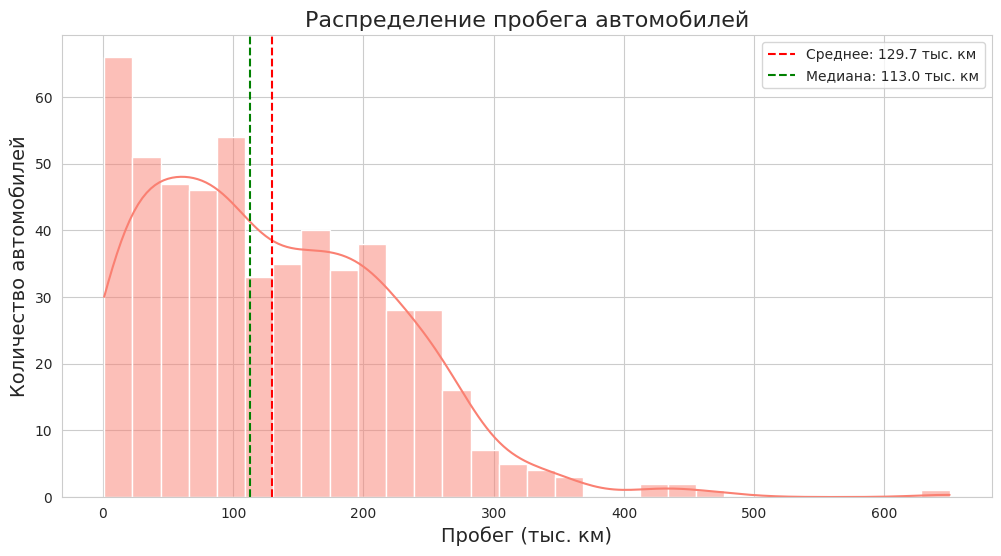

In [26]:
# 2. Распределение пробега
plt.figure()
sns.histplot(data['Пробег'], bins=30, kde=True, color='salmon')
plt.title('Распределение пробега автомобилей', fontsize=16)
plt.xlabel('Пробег (тыс. км)', fontsize=14)
plt.ylabel('Количество автомобилей', fontsize=14)
plt.axvline(data['Пробег'].mean(), color='red', linestyle='--', label=f'Среднее: {data["Пробег"].mean():.1f} тыс. км')
plt.axvline(data['Пробег'].median(), color='green', linestyle='--', label=f'Медиана: {data["Пробег"].median():.1f} тыс. км')
plt.legend()
plt.show()

Большинство автомобилей (около 80%) имеют пробег до 200 тыс. км.
Автомобили с пробегом свыше 400 тыс. км встречаются редко, также как и новые авто с пробегом менее 10 тыс. км.

Вывод: Покупатели предпочитают автомобили с умеренным пробегом, что снижает риски износа

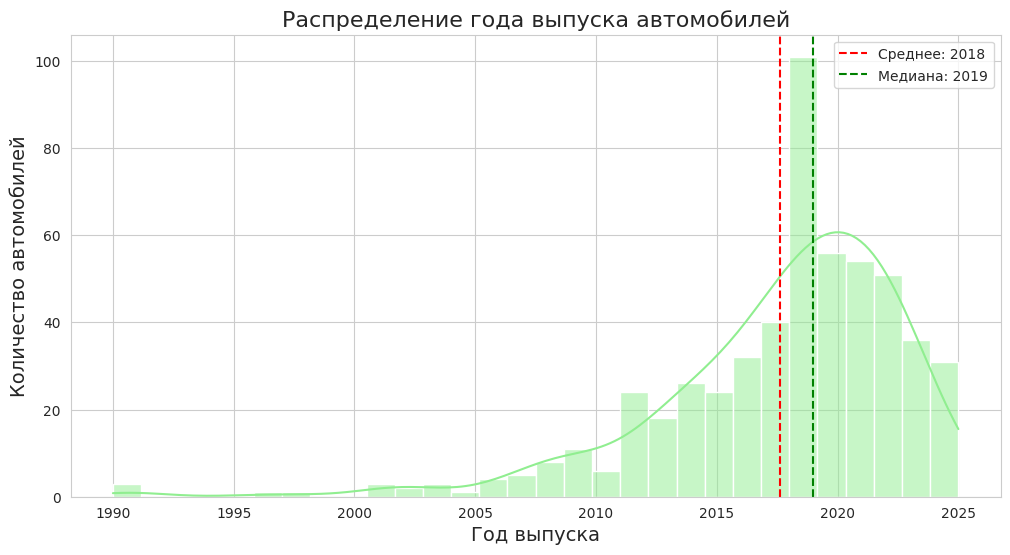

In [27]:
# 3. Распределение года выпуска
plt.figure()
sns.histplot(data['Год'], bins=30, kde=True, color='lightgreen')
plt.title('Распределение года выпуска автомобилей', fontsize=16)
plt.xlabel('Год выпуска', fontsize=14)
plt.ylabel('Количество автомобилей', fontsize=14)
plt.axvline(data['Год'].mean(), color='red', linestyle='--', label=f'Среднее: {data["Год"].mean():.0f}')
plt.axvline(data['Год'].median(), color='green', linestyle='--', label=f'Медиана: {data["Год"].median():.0f}')
plt.legend()
plt.show()

Пик предложений приходится на 2015–2020 годы — период, когда автомобили сохраняют современные технологии, но уже успели опуститься в цене.
Мало предложений до 2010 года. Автомобили 2023–2025 годов встречаются редко.

На рынке доминируют автомобили возрастом 5–10 лет, что оптимально для соотношения цены и качества.

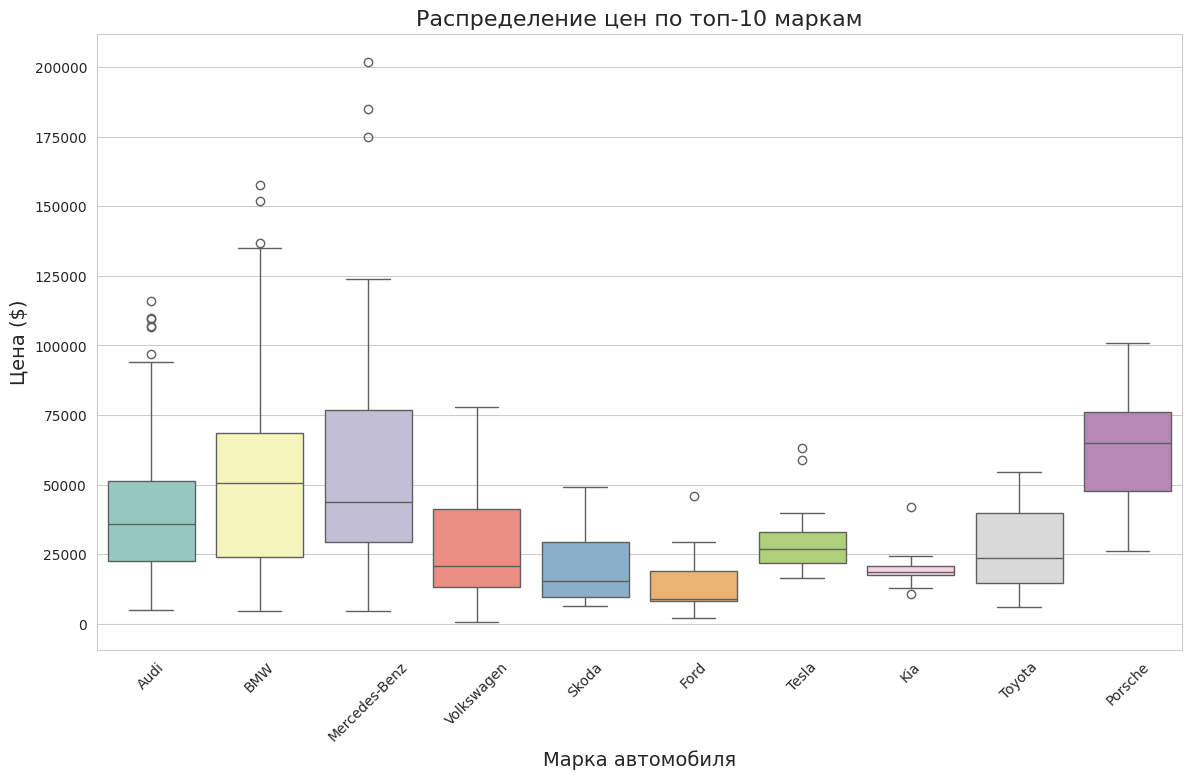

In [28]:
# 4. Boxplot цен по маркам (топ-10)
plt.figure(figsize=(14, 8))
top_10_brands = data['Марка'].value_counts().head(10).index
sns.boxplot(data=data[data['Марка'].isin(top_10_brands)], x='Марка', y='Цена(в $)', palette='Set3')
plt.title('Распределение цен по топ-10 маркам', fontsize=16)
plt.xlabel('Марка автомобиля', fontsize=14)
plt.ylabel('Цена ($)', fontsize=14)
plt.xticks(rotation=45)
plt.show()

Дорогие марки - Porsche, Mercedes-Benz, BMW, Audi — медианная цена выше $40 000.
  
Бюджетные марки - Volkswagen, Renault, Ford — медианная цена ниже $20 000.

Высокий разброс цен у Land Rover и Volvo.
Также у всех марок есть аномально дорогие предложения

Вывод: Немецкие премиум-бренды лидируют по стоимости, а массовые марки обеспечивают доступный сегмент

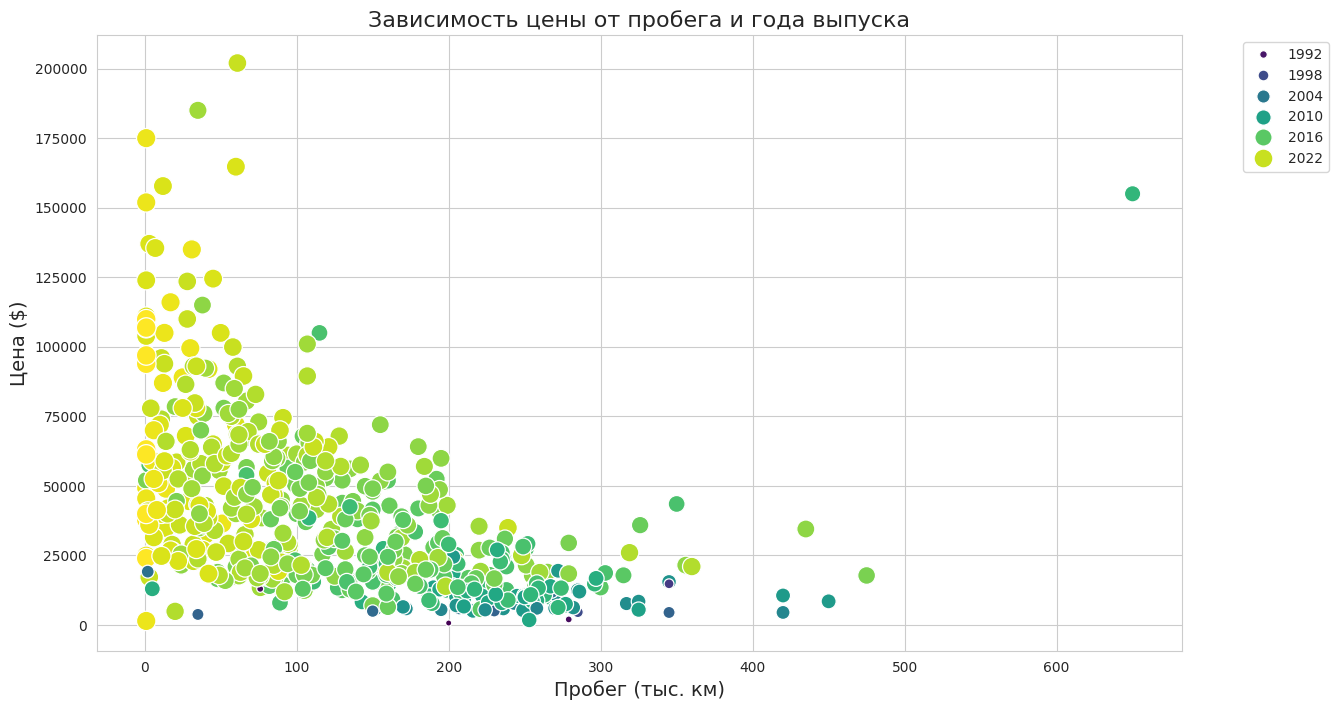

In [29]:
# 5. Диаграмма рассеивания: цена vs пробег с группировкой по году
plt.figure(figsize=(14, 8))
scatter = sns.scatterplot(data=data, x='Пробег', y='Цена(в $)', hue='Год', palette='viridis', size='Год', sizes=(20, 200))
plt.title('Зависимость цены от пробега и года выпуска', fontsize=16)
plt.xlabel('Пробег (тыс. км)', fontsize=14)
plt.ylabel('Цена ($)', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Чем выше пробег, тем ниже цена.

Чем новее автомобиль, тем выше цена.

Эти 2 фактора являются ключевыми для ценообразования

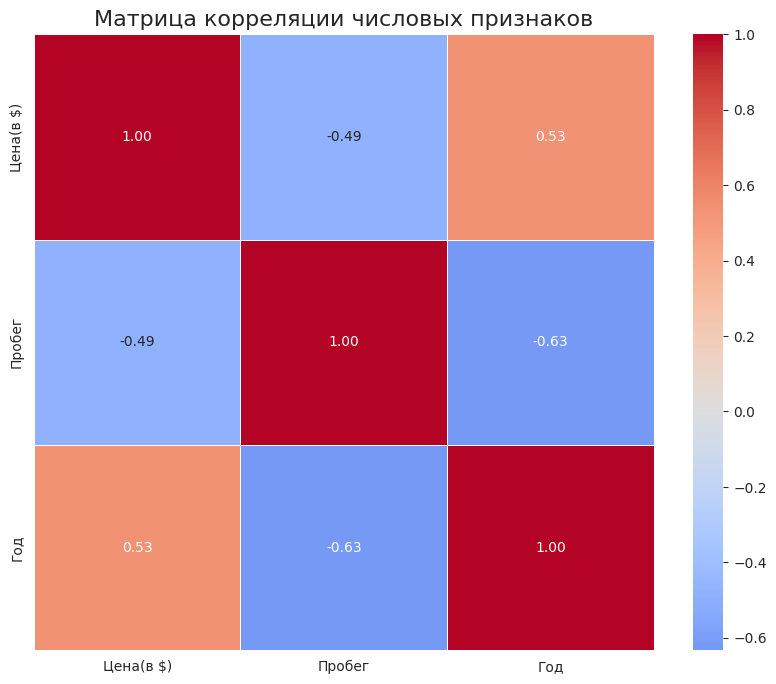

In [30]:
# 6. Корреляционный анализ
correlation_matrix = data[['Цена(в $)', 'Пробег', 'Год']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=.5)
plt.title('Матрица корреляции числовых признаков', fontsize=16)
plt.show()


Цена и год выпуска: +0.53 (умеренная связь).

Цена и пробег: -0.49 (умеренная обратная связь).

Пробег и год выпуска: -0.63 (сильная обратная связь: новые авто обычно имеют меньший пробег).

Вывод: Для предсказания цены важнее всего год, затем — пробег.

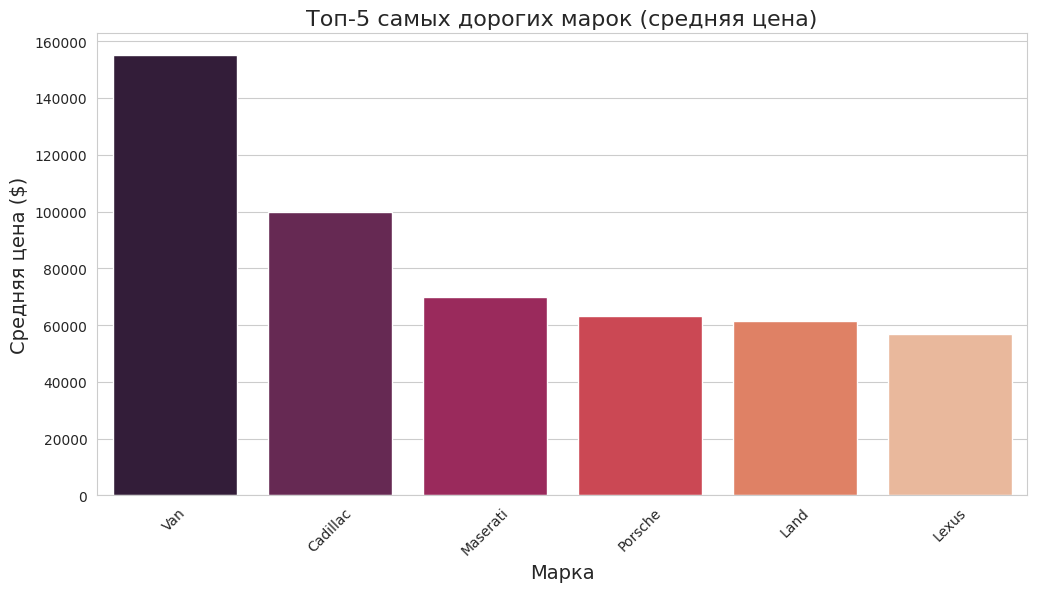

In [32]:
# 7. Топ-5 марок по средней цене
top_5_expensive = data.groupby('Марка')['Цена(в $)'].mean().sort_values(ascending=False).head(6)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_5_expensive.index, y=top_5_expensive.values, palette='rocket')
plt.title('Топ-5 самых дорогих марок (средняя цена)', fontsize=16)
plt.xlabel('Марка', fontsize=14)
plt.ylabel('Средняя цена ($)', fontsize=14)
plt.xticks(rotation=45)
plt.show()

Самыми дорогими марками автомобилей являются Cadillac, Maserati, Porsche, Land Rover, Lexus.
Автомобили марки Van Hool выделяются по цене из за направленность марки на автобусный и грузовой транспорт, а также из за редкости моделей.

Вывод: Графики и статистика подтверждают, что рынок подержанных автомобилей структурирован вокруг логичных зависимостей: цена падает с пробегом и растет с новизной, а бренд определяет позиционирование.